In [4]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

1.Tables are a powerful way of organizing and visualizing data
2.However they can be difficult to interpret data.
3.Last time we introduced how to make 3 types of graphs
4.This class we will look at how to interpret data usinh  graphs



Terminology

1. Indiviuals - object that has associated data

 
A indiviuals is a formal name for an object that has associated data
For example last time we saw census data and the indivualswhere population of males and females

2. Variables - the associated data of an individual

-Variables are a feature or the associated data of an individual
-Typically variables are the columns in a table
-And they generally ave different values 
-We saw also that theres two types of data numerial and catergoical 
-Remember that numerical values are ordered sets like ages or times
-And catergorical data is like data that can be placed in groups with no ---particular order 
-Its important to note that all variables take only one value
For example the amount of money a movie grossed one year is fixed
Variables cannot take multiple values

3. Distributions -Counting the unique values and how many indivuals have that
value

-Finally we get to the topic of the day which is distributaion!
What is distribution?
-Welll dsitrinution isessentially when you take eachinuq values of a the vraible an conu up homw many indivuals that have thos unqie vlues
-we will also look at two types of distributions! Catergoircal and numerical


## Lecture 8 ##

## Categorical Distribution ##

In [5]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

# we want to look at how many 

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


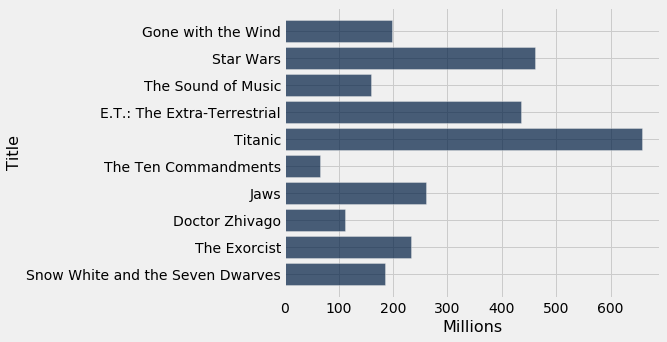

In [15]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
top_movies.take(np.arange(10)).barh('Title', 'Millions')

# What does this line Produce? 
# Juts a adds  a comun converting gross into readable infor!

# How would you make a barchat with top ten grossingfiles?
#top=top_movies.sort('Millions',descending = True)

#top.take(np.arange(10)).barh('Title', 'Millions')


In [17]:
#The Distribution of a variable describes the frequeinces of differetn values



# Now Question we want to dind the top 10 movie studios that produce
#the highest nummber of movies 


#Question: Find the top 10 movie producing studios!

studios = top_movies.select('Studio')
studios

#Step 1 select thee column
#Step 2 he number of times each name appears
#Step 3 Rank the top 10 names
#Step 4 Graph using histogram

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [20]:
studio_distribution = studios.group('Studio')
#tbl.group(column_or_columns) ->new table with counts
#Do not worry to much about all the functionallity we will discuss this
#over the next wfew weeks

#But this is a very cool and useful Function!



In [19]:
studio_distribution

# We call this a distribution table. A distribution shows
#all the values of a variable, along with the frequency of each one.



#Bar Chart 

# Now we will visualize this using a Barchart 
#since these are caterigocial variables@



Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [7]:
sum(studio_distribution.column('count'))

# lets go ahead and find the top 10 movie producers using sort!

200

## Bar Charts ##

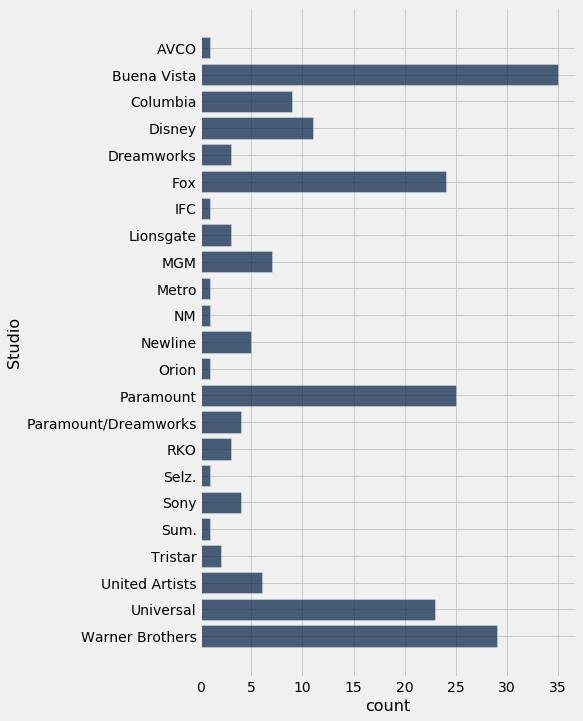

In [8]:
# NoteS

#1. If you have a catergoical variable the distribution is categorical
#2. Barcharts are again used for categorical information
#3. One axis is catergical variable like movie names the other 
#is numberical like gross income

studio_distribution.barh('Studio')
# Recall we are still producing a barchart herer
#This is a little easier to read then a chart of numbers 

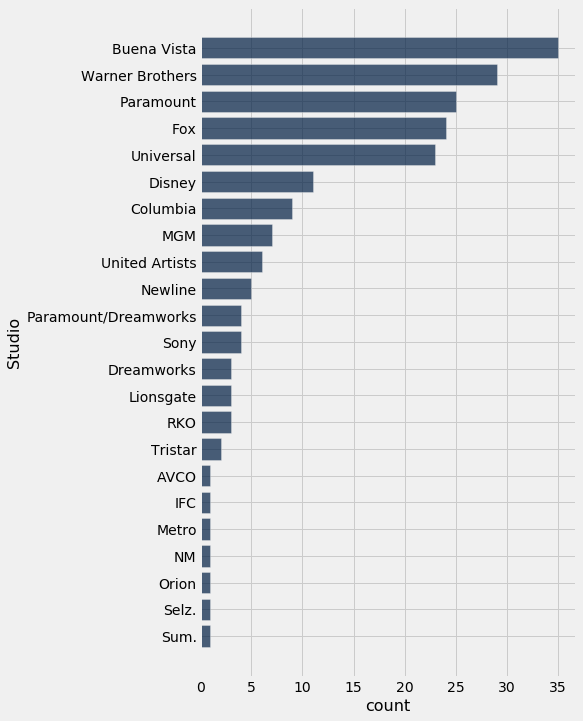

In [24]:
studio_distribution.sort('count', descending=True).barh('Studio')

# notice is that these bars are all equally wide
#this is so we can easy to compare different categories,


## Numerical Distribution ##

1. So now we will talk about numerical variables and distributations

2. remember distribution is looking at the unique values and the frequency of how many times each one comes up

3. When you have something numerical you may have each value it only comes out one time because there's like infinitely many value

4.An example of this the money made by movies: maybee one film gross 30 millions where another one gorsse 45 millino

5. If you were to visualize this using a barchart you would have an inifite number of bars

6.  to fix this we will find where most of these values actually are and how often they're coming up. 

7.So, with numerical variables we're going to bin them and what that means is we're going to basically count the number of values that lie within specific ranges.


DEF - Binning -count the number of values that lie within specific ranges.

In this next example we will use binning to group movies on their age then present the number of movies using a histogram 


In [25]:
ages = 2021 - top_movies.column('Year')
# here we need t o chang e this to 2021
# What does this first column do?
top_movies = top_movies.with_column('Age', ages)




In [26]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,82
Star Wars,Fox,460998007,1583483200,1977,460.998,44
The Sound of Music,Fox,158671368,1266072700,1965,158.671,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,39
Titanic,Paramount,658672302,1204368000,1997,658.672,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,65
Jaws,Universal,260000000,1138620700,1975,260,46
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,56
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,84


## Binning ##

In [12]:
min(ages), max(ages)
#Now we are going 'place' movies into bins !

(2, 98)

In [2]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)
# here we have the 'age' of movies
#this will be our bins where we count the moives age

NameError: name 'make_array' is not defined

In [30]:
# now wer are going count the number of movies that are of each age or bin
# we are using a new function .bin

#table().bin('Column_name'=variable we want to bin on, bins= 'how you want to bin' )
#note this creates a new Table!

binned_data = top_movies.bin('Age', bins = my_bins)
binned_data
top_movies.bin('Age', bins = my_bins)


# Note group method counts the number of tims 1 object appears
# bin counts the number of times objects appear in a certain range

bin,Age count
0,3
5,25
10,18
15,39
25,42
40,53
65,20
100,0


In [15]:
#note - left number is start of bin 0-5 , 5-10 ....

sum(binned_data.column('Age count'))

200

In [33]:
#Find the count of all movies over the last 20 years binned into intervals of
#2 years

top_movies.bin('Age', bins = np.arange(0, 21, 2))

bin,Age count
0,0
2,0
4,12
6,9
8,7
10,5
12,8
14,6
16,9
18,16


In [17]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,91
25,68
50,0


In [18]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969,102.309,50


## Histograms ##

1.  We are now going to use a to displays a distribution of numerical variables

2.  This is like a barch except each bar corresponds to a bin

3. The area of each bar represents the precenta of indiviudals in the 
corrosponding bin 


In [1]:
my_bins

NameError: name 'my_bins' is not defined

In [38]:
binned_data # here is our bin infor

#before we viusalize this lets find the percentage of each bin

#step 1 compute total number of movies
sum(binned_data.column('Age count'))

#step 2 divide bins by total number of movies
binned_data.column('Age count')/200*100

#step 3 add to table

binned_data=binned_data.with_column('Percentage',binned_data.column('Age count')/200*100
)

binned_data

bin,Age count,Percentage
0,3,1.5
5,25,12.5
10,18,9
15,39,19.5
25,42,21
40,53,26.5
65,20,10
100,0,0


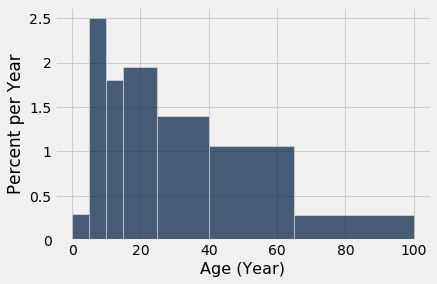

In [39]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')
#The input for our hist method are
#table('Column name'-column to be binned,bins = bin_array, units - percentperunit)
#the area of the bins are equal to the percenage of the overall data

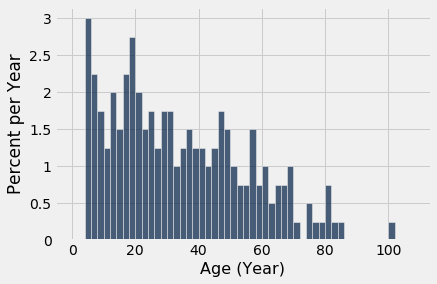

In [43]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 2), unit = 'Year')

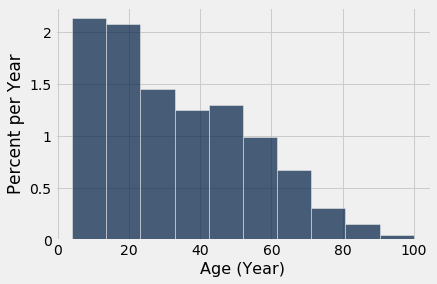

In [44]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [24]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [25]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


## Height ##

### Question: What is the height of the [40, 65] bin?

In [26]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [27]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [28]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.02

### What are the heights of the rest of the bins?

In [29]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [30]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [32]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [33]:
bin_lefts

bin,Age count,Percent,Width,Height
0,18,9,5,1.8
5,15,7.5,5,1.5
10,17,8.5,5,1.7
15,41,20.5,10,2.05
25,41,20.5,15,1.36667
40,51,25.5,25,1.02
65,17,8.5,35,0.242857


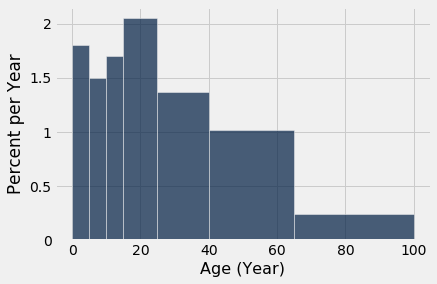

In [34]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')